<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4 - PCA Lab

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
data = pd.read_csv(breast_cancer_csv,index_col='id')

# EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
data.shape

(569, 32)

In [4]:
#column seems to be filled with blank values and would proceed to drop it
data.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
#Rename diagnosis to M=1, B=0
le=LabelEncoder()
data["diagnosis"]=le.fit_transform(data["diagnosis"])

In [6]:
#removing correlation above 0.9
corr=data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
new_data = data[selected_columns]

In [7]:
new_data.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.330499,-0.012838,0.567134,-0.008303,...,0.292999,0.253730,0.408042,-0.006522,0.077972,0.421465,0.590998,0.659610,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,...,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,...,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,...,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,...,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,...,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,...,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,...,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,...,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
texture_se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,...,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.092439,-0.068956,-0.128215,-0.045655


# Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [17]:
# ANSWER

data1 = new_data.drop('diagnosis', axis=1)
feature_columns = data1.columns
feature_columns


Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
# Standarize X
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_sc = scaler.fit_transform(data1) 

In [15]:
X_sc

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.10952635,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.14674897,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  0.85497394,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.3267666 ,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  3.19760468,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.30583065,
        -0.04813821, -0.75120669]])

# Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [19]:
# ANSWER
pd.DataFrame(X_sc, columns=feature_columns)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,-0.312589,-0.931027,2.782080,0.071025,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.378365,-0.273318,0.664512,-1.360158,-0.709091
565,1.704854,2.085134,0.102458,-0.017833,0.693043,-0.217664,-1.058611,1.300499,2.260938,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,-0.691230,-0.394820,0.236573,-0.531855,-0.973978
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,-0.809117,-0.895587,0.184892,-0.257371,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,-0.809587,0.350735,0.326767,-1.104549,-0.318409
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.137194,1.043695,1.157935,0.686088,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.430427,3.904848,3.197605,1.919083,2.219635


In [20]:
X_corr = pd.DataFrame(X_sc, columns=feature_columns).corr()
X_corr

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
texture_mean,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
smoothness_mean,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
symmetry_mean,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
radius_se,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
texture_se,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.092439,-0.068956,-0.128215,-0.045655
smoothness_se,-0.222600,0.006614,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,-0.055558,-0.058298,-0.107342,0.101480


## Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [21]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(X_corr)

In [22]:
#length of eigenvalues
len(eigenvalues)

20

## Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

$$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [23]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    tot = sum(eigenvalues)
    var_exp = []
    for i in eigenvalues:
        var_i = (i/tot)*100
        var_exp.append(var_i)
    cum_var_exp = np.cumsum (var_exp)
    return cum_var_exp

In [33]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative Variance Explained (%)', fontsize=16)
    ax.set_xlabel('No. of Components', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('Component vs Cumulative Variance Explained\n', fontsize=20)

    plt.show()

# Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [24]:
from sklearn.decomposition import PCA

In [31]:
# ANSWER
# Create an instance of PCA
pca = PCA()

# Fit Xs
Xs = pca.fit(X_sc)

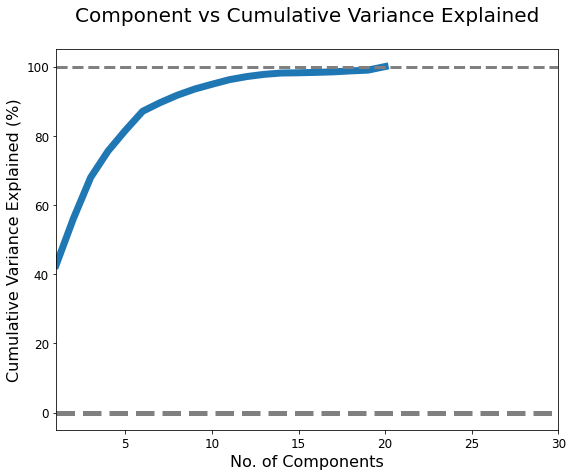

In [34]:
# ANSWER
# Plot explained_variance_
plot_var_exp(eigenvalues)

#15 components is sufficient to get 100%

In [51]:
# ANSWER
# Apply dimensionality reduction to Xs using transform


#Transform standardised data with PCA
pca1 = PCA(n_components=15)

#fit PCA with standardised features
std_pca = pca1.fit_transform(X_sc)



In [52]:
pd.DataFrame(std_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,7.284671,-1.208271,-1.858766,-0.836040,0.642161,-2.406943,-1.656136,-0.839583,0.730373,0.548312,0.843653,0.251745,-0.767297,-0.383423,-0.708126
1,-0.935879,-1.832671,0.636750,0.279874,-0.244476,-0.824172,-0.315330,-0.335931,-0.726305,0.300885,0.314905,-0.588736,0.690045,-0.841064,0.340263
2,3.151689,-1.903737,0.555302,-0.696233,0.108278,-0.893050,0.213089,-0.141652,-0.450688,-0.530465,-0.264921,-0.484401,0.205008,0.093155,0.067919
3,11.347898,2.319956,-5.442608,-1.917882,3.270746,0.121826,-0.383612,-1.990400,1.161937,-0.429158,-1.380756,-0.822577,-0.178090,-0.494565,-0.429086
4,1.384769,-0.726611,1.644099,-0.005704,-2.077323,-1.971702,0.603534,-0.336399,-0.191956,0.447599,0.551826,0.350419,0.450675,-0.665382,0.205578


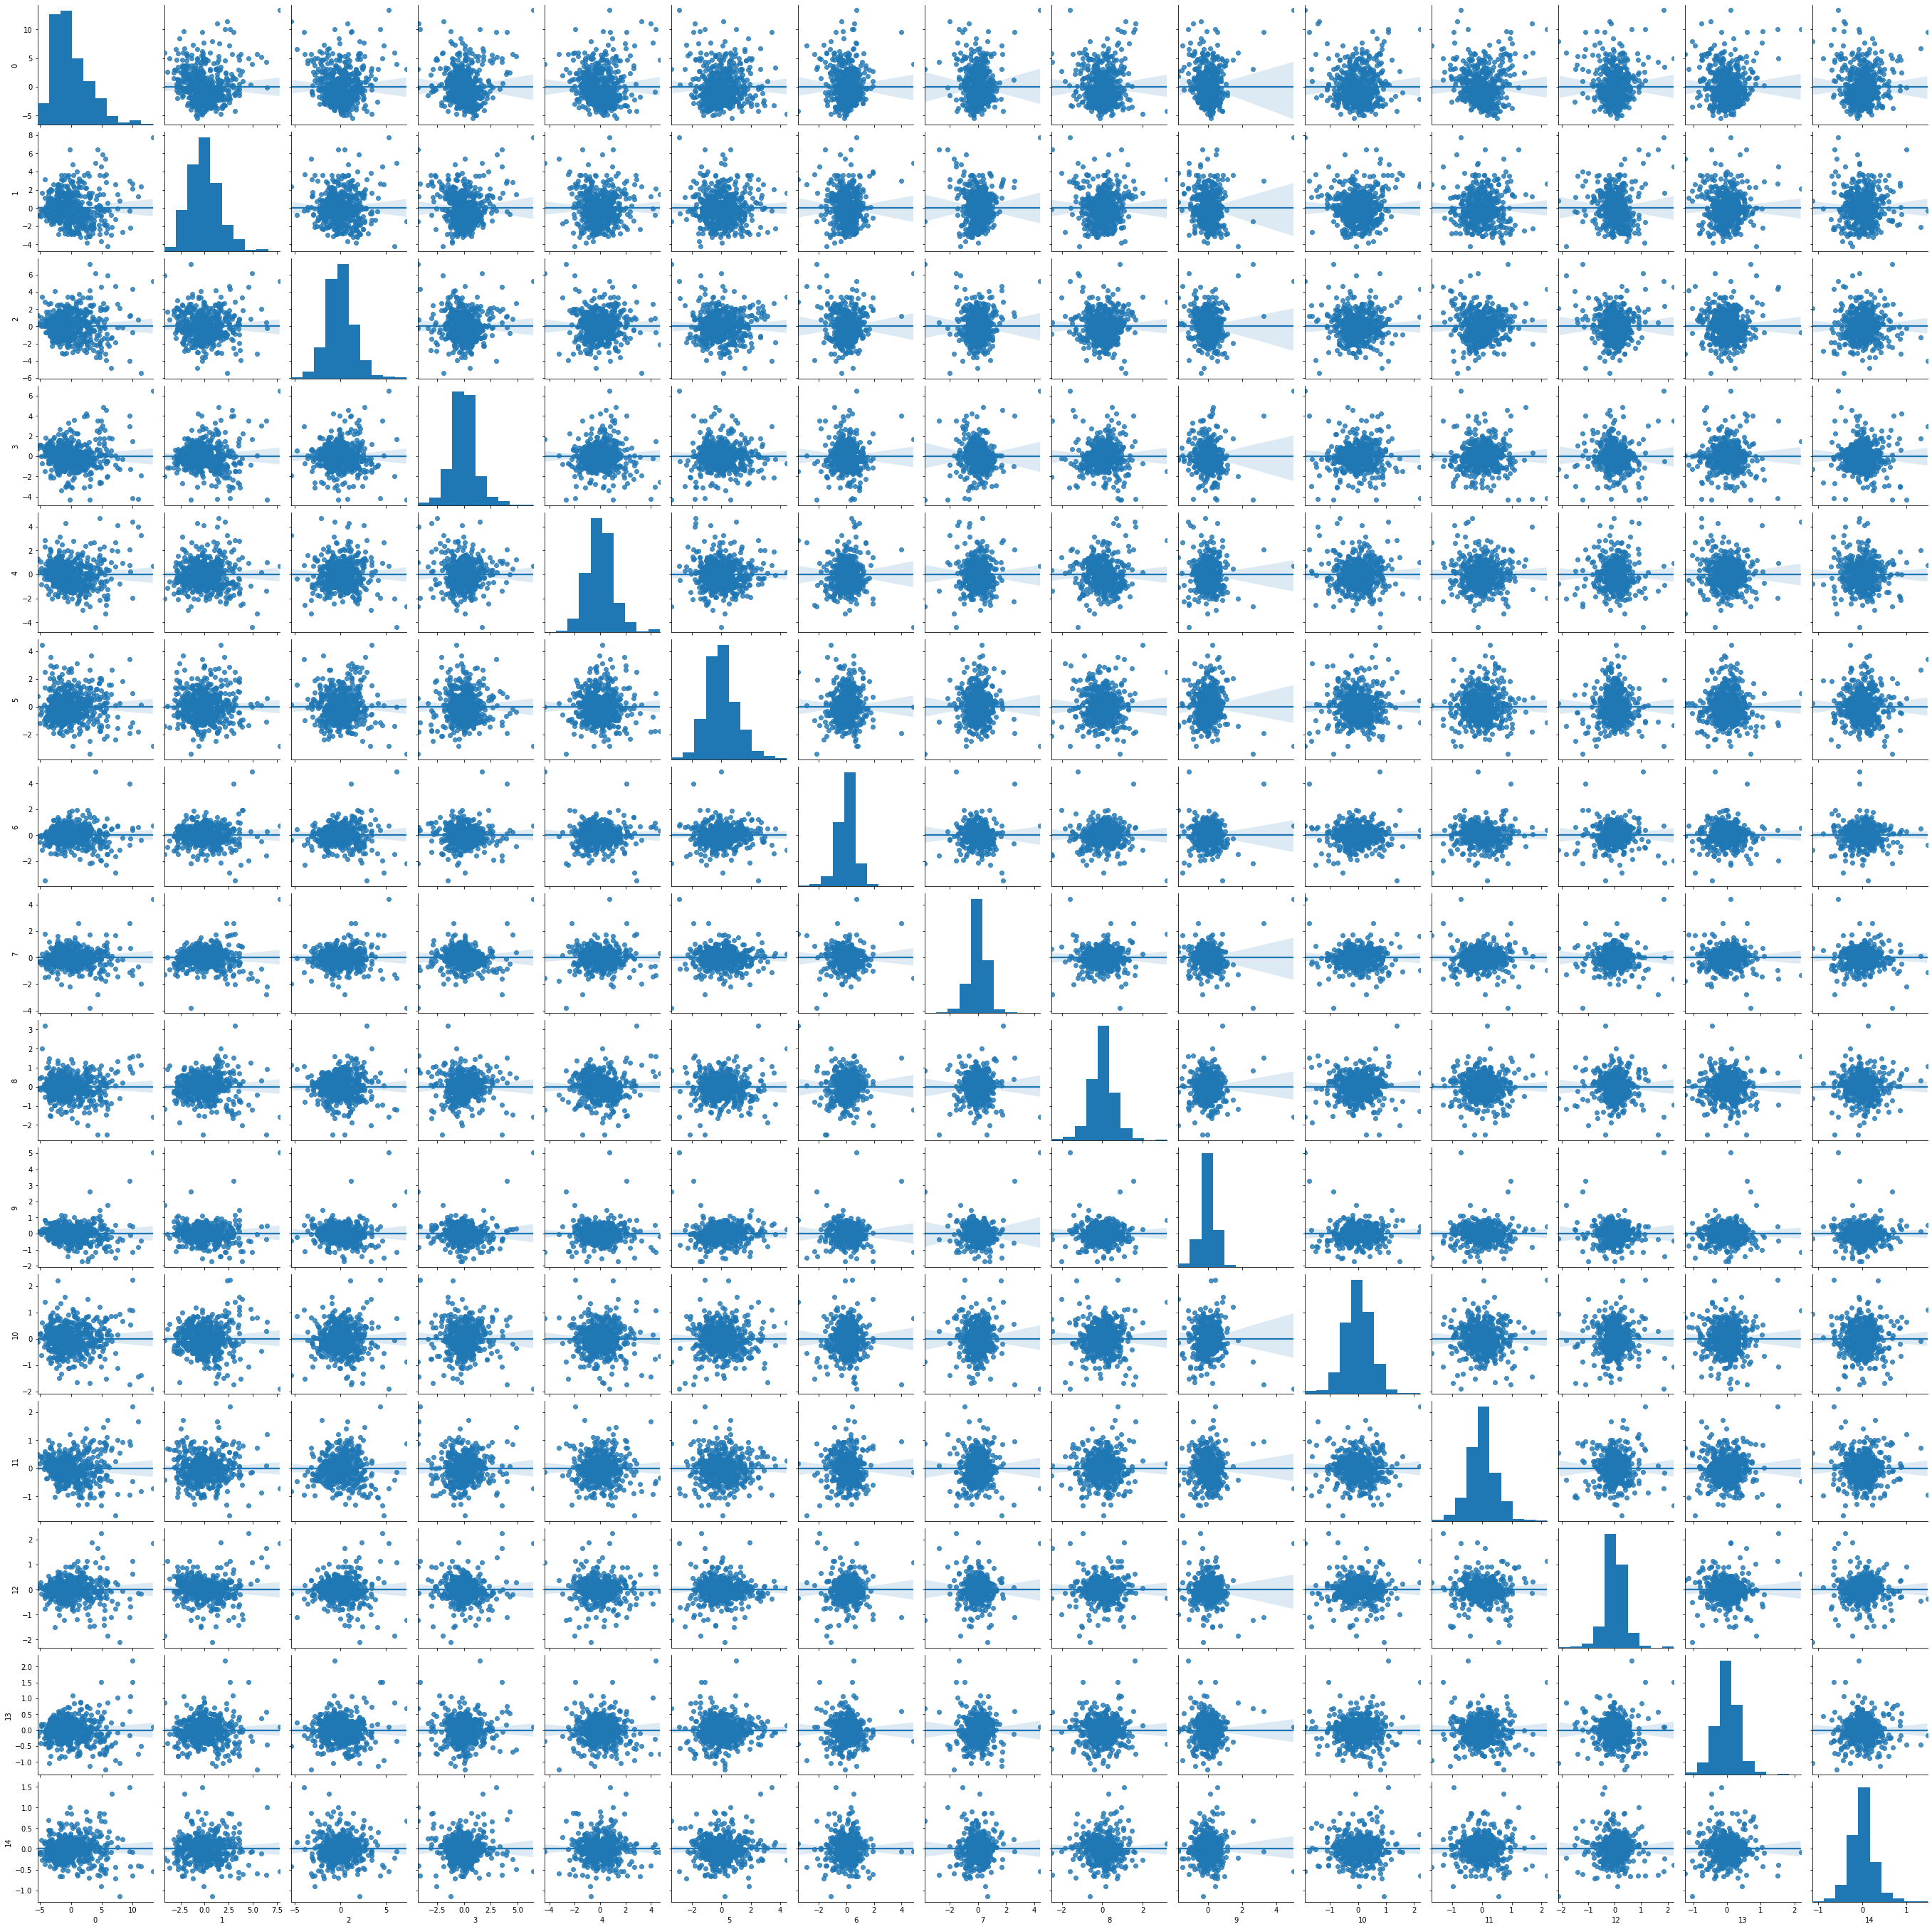

In [55]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(pd.DataFrame(std_pca), kind='reg');

## Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [60]:
# ANSWER
# Split PCA
y = new_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(std_pca, y, test_size=0.2, random_state=42)

#split standardised data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)


In [61]:
# ANSWER

# Set KNN classifier to use 5 nighbors
knn5 = KNeighborsClassifier(n_neighbors=5)

#CV accuracy of KNN using standardised data
standard_scores = cross_val_score (knn5, Xs_train, ys_train, cv=5)
print("Number of features in standarised data: ", X_sc.shape[1])
print("5 fold CV accuracy using standardised data: ", standard_scores.mean())

Number of features in standarised data:  20
5 fold CV accuracy using standardised data:  0.9538461538461538


In [63]:
#CV accuracy of KNN using PCA-transformed data
pca_scores = cross_val_score (knn5, X_train, y_train, cv=5)
print("Number of features in PCA-transformed data: ", std_pca.shape[1])
print("5 fold CV accuracy using PCA-transformed data: ", pca_scores.mean())

Number of features in PCA-transformed data:  15
5 fold CV accuracy using PCA-transformed data:  0.9538461538461538


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)

© 2019 Institute of Data